<a href="https://colab.research.google.com/github/Candongo-Dev/Data-Analysis-with-Python-Pandas-2025/blob/main/Data_Analysis_with_Python_%26_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas library-Based Data Analysis**: Prioritizing Dataset Insights over Functional Abstractions in **Data Science**

In [137]:
import pandas as pd


In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [139]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [141]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [142]:
df.shape

(133349, 11)

In [143]:
lines, columns = df.shape[0], df.shape[1]
print("lines:", lines)
print("columns:", columns)

lines: 133349
columns: 11


In [144]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Renaming DataFrame Columns

In [145]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'Year',
    'experience_level': 'seniority',
    'employment_type': 'contract',
    'job_title': 'position',
    'salary': 'salary',
    'salary_currency': 'currency',
    'salary_in_usd': 'usd',
    'employee_residence': 'residence',
    'remote_ratio': 'remote',
    'company_location': 'residence',
    'company_size': 'company size'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


# Analyzing what the categories of categorical columns are

Seniority Level

In [146]:
seniority = {
    'SE': 'Senior',
    'MI': 'Mid-level',
    'EN': 'Entry-level',
    'EX': 'Executive'
}

df['seniority'] = df['seniority'].replace(seniority)
(df['seniority'].value_counts())

,count
seniority,
Senior,77241
Mid-level,40465
Entry-level,12443
Executive,3200


# **Type of contract**

In [147]:
contract = {
    'FT': 'full-time',
    'PT': 'part-time',
    'CT': 'contract',
    'FL': 'freelancer'
}
df['contract'] = df['contract'].replace(contract)
df['contract'].value_counts()

,count
contract,
full-time,132563
contract,394
part-time,376
freelancer,16


In [148]:
df['remote'].value_counts()


,count
remote,
0,105312
100,27718
50,319


The remote model enables employees to work from any location without commuting to the company. The in-person model requires daily presence at the office.
The hybrid model blends both approaches, offering flexibility. The 'everywhere' model less common allows work from anywhere in the world, with no geographic limitations.

In [149]:
company_size = {
    'M': 'Medium',
    'L': 'Large',
    'S': 'Small'
}

df['company size'] = df['company size'].replace(company_size)

display(df['company size'].value_counts())

,count
company size,
Medium,129561
Large,3574
Small,214


In [150]:
remote_ratio = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
}

df['remote'] = df['remote'].map(remote_ratio)

display(df['remote'].value_counts())

,count
remote,
On-site,105312
Remote,27718
Hybrid,319


In [151]:
# @title Default title text
df.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,2025.0,Senior,full-time,Solutions Engineer,214000,USD,214000,US,Remote,US,Medium
1,2025.0,Senior,full-time,Solutions Engineer,136000,USD,136000,US,Remote,US,Medium
2,2025.0,Mid-level,full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Entry-level,full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


We can also summarize categorical information using the **describe()** method, which displays the number of unique categories, the most frequent category, and its corresponding frequency:

In [152]:
df.describe(include="object")

,seniority,contract,position,currency,residence,remote,residence,company size
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,full-time,Data Scientist,USD,US,On-site,US,Medium
freq,77241,132563,17314,126140,119579,105312,119641,129561


With this initial analysis, we were able to answer several key questions, such as:

*   What is the most common level of experience in the dataset?
*   What is the predominant type of contract?
*   Which job position appears most frequently in the sample?
*   Which country do most professionals in the dataset come from?
*   Where are the majority of companies in the sample headquartered?
*   What is the most common employment status?
*   What is the typical size of companies represented in the sample?

**The code serves as a step-by-step guide for understanding, cleaning, and preparing the dataset for more in-depth analysis, enabling clearer visualization of patterns and trends within the data science job market**.

# Data preparation and cleaning

In [153]:
df.isnull()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [154]:
df.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,2025.0,Senior,full-time,Solutions Engineer,214000,USD,214000,US,Remote,US,Medium
1,2025.0,Senior,full-time,Solutions Engineer,136000,USD,136000,US,Remote,US,Medium
2,2025.0,Mid-level,full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Entry-level,full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


In [155]:
df.isnull().sum()

,0
Year,10
seniority,0
contract,0
position,0
salary,0
currency,0
usd,0
residence,0
remote,0
residence,0


In [156]:
df["Year"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [157]:
df[df.isnull().any(axis=1)]

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
5588,NaN,Senior,full-time,Product Manager,184500,USD,184500,US,On-site,US,Medium
59692,NaN,Mid-level,full-time,Engineer,110000,USD,110000,DE,On-site,DE,Medium
59710,NaN,Entry-level,full-time,Data Scientist,208800,USD,208800,US,On-site,US,Medium
59759,NaN,Senior,full-time,Software Engineer,135000,USD,135000,US,On-site,US,Medium
59789,NaN,Senior,full-time,Engineer,112000,USD,112000,US,On-site,US,Medium
131000,NaN,Senior,full-time,Machine Learning Engineer,163800,USD,163800,US,On-site,US,Medium
131006,NaN,Senior,full-time,Data Analytics Manager,204500,USD,204500,US,On-site,US,Medium
133054,NaN,Entry-level,full-time,Data Scientist,40000,USD,40000,JP,Remote,MY,Large
133281,NaN,Mid-level,full-time,Machine Learning Engineer,180000,PLN,46597,PL,Remote,PL,Large
133317,NaN,Mid-level,full-time,Data Scientist,130000,USD,130000,US,Hybrid,US,Large


Samen project, but new Data Frame:

In [158]:
import numpy as np

# Creating a test dataframe to use as an example
df_salaries = pd.DataFrame({
    'name': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salary': [4000, np.nan, 5000, np.nan, 100000]
})

#Calculates the mean salary, replaces null entries with the mean, and rounds the values
df_salaries["salary media"] = df_salaries["salary"].fillna(df_salaries["salary"].mean().round(2))


'''calculate the median and replaces the nulls with the median
'''
df_salaries["salary median"] = df_salaries["salary"].fillna(df_salaries["salary"].median())
display(df_salaries)

,name,salary,salary media,salary median
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [159]:
df_temperature = pd.DataFrame({
    "Day": ["Monday", "Tuesday", "Wednesday", "Thurday", "Friday"],
    "Temperature": [30, np.nan, np.nan, 28,27]
})

df_temperature["filled ffill"] = df_temperature["Temperature"].ffill()
df_temperature

,Day,Temperature,filled ffill
0,Monday,30.0,30.0
1,Tuesday,NaN,30.0
2,Wednesday,NaN,30.0
3,Thurday,28.0,28.0
4,Friday,27.0,27.0


In [160]:
df_cities = pd.DataFrame({
'name': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
'cities': ["Texas", np.nan, "Orlando", np.nan, "Houston"]
})
df_cities["filled city"] = df_cities["cities"].fillna("not informed")
display(df_cities)

,name,cities,filled city
0,Ana,Texas,Texas
1,Bruno,NaN,not informed
2,Carlos,Orlando,Orlando
3,Daniele,NaN,not informed
4,Val,Houston,Houston


In [161]:
df_clean = df.dropna()

In [162]:
df_clean.isnull().sum()

,0
Year,0
seniority,0
contract,0
position,0
salary,0
currency,0
usd,0
residence,0
remote,0
residence,0


In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          133339 non-null  float64
 1   seniority     133339 non-null  object 
 2   contract      133339 non-null  object 
 3   position      133339 non-null  object 
 4   salary        133339 non-null  int64  
 5   currency      133339 non-null  object 
 6   usd           133339 non-null  int64  
 7   residence     133339 non-null  object 
 8   remote        133339 non-null  object 
 9   residence     133339 non-null  object 
 10  company size  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [164]:
df_clean = df_clean.assign(work_year = df_clean ["year"].astype('int64'))

KeyError: 'year'

In [ ]:
df_clean.head()

# Data Visualization Stage
Statistical graphs are essential for exploring and conveying insights from data. I used histograms, boxplots, and bar charts to enhance the understanding and interpretation of the DataFrame.

In [165]:
df_clean.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,2025.0,Senior,full-time,Solutions Engineer,214000,USD,214000,US,Remote,US,Medium
1,2025.0,Senior,full-time,Solutions Engineer,136000,USD,136000,US,Remote,US,Medium
2,2025.0,Mid-level,full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Entry-level,full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


<Axes: title={'center': 'Seniority distribution'}, xlabel='seniority'>

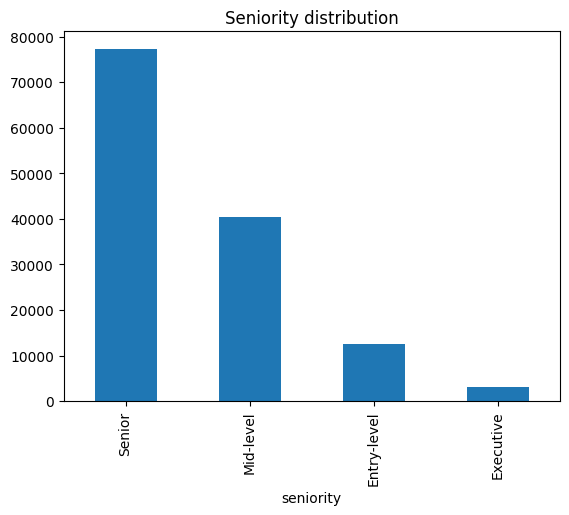

In [166]:
df_clean["seniority"].value_counts().plot(kind="bar", title="Seniority distribution")

In [167]:
import seaborn as sns

<Axes: xlabel='seniority', ylabel='usd'>

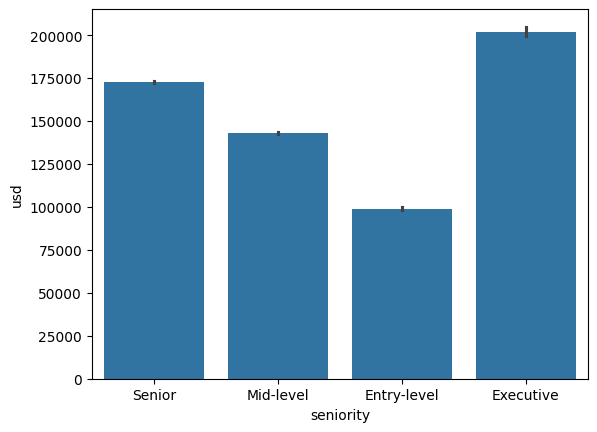

In [168]:
import seaborn as sns
sns.barplot(data=df_clean, x='seniority', y='usd')

In [169]:
import matplotlib.pyplot as plt


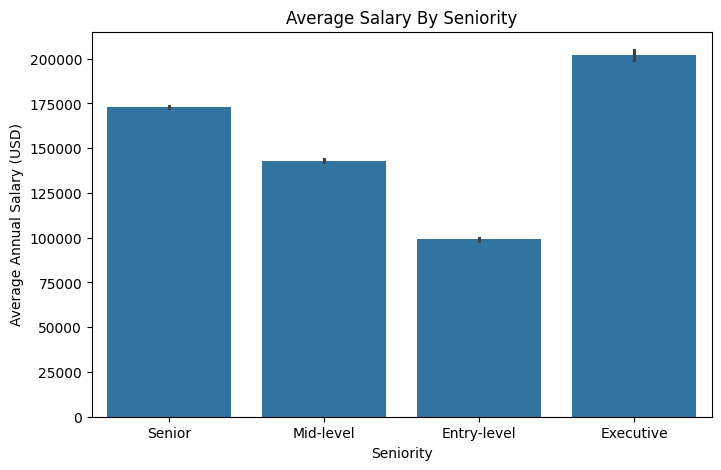

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_clean, x='seniority', y='usd')
plt.title('Average Salary By Seniority')
plt.xlabel('Seniority')
plt.ylabel('Average Annual Salary (USD)')
plt.show()

In [171]:
df_clean.groupby('seniority')['usd'].mean().sort_values(ascending=False)

,usd
seniority,
Executive,202027.667813
Senior,172850.838301
Mid-level,143044.845979
Entry-level,99034.963267


In [172]:
df_clean.groupby('seniority')['usd'].mean().sort_values(ascending=True).index

Index(['Entry-level', 'Mid-level', 'Senior', 'Executive'], dtype='object', name='seniority')

In [173]:
import pandas as pd

# Recreate df_clean by dropping nulls and converting 'work_year' to int64
df_clean = df.dropna()
df_clean = df_clean.assign(work_year = df_clean["Year"].astype("int64"))

order = df_clean.groupby('seniority')['usd'].mean().sort_values(ascending=False).index

In [174]:
order

Index(['Executive', 'Senior', 'Mid-level', 'Entry-level'], dtype='object', name='seniority')

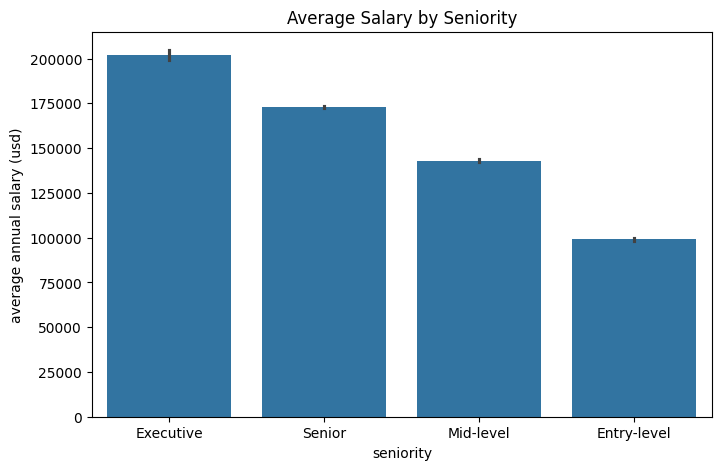

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recreate df_clean by dropping nulls and converting 'work_year' to int64
df_clean = df.dropna()
df_clean = df_clean.assign(work_year = df_clean["Year"].astype("int64"))

plt.figure(figsize=(8, 5))
sns.barplot(data=df_clean, x='seniority', y='usd', order=order)
plt.title('Average Salary by Seniority')
plt.xlabel('seniority')
plt.ylabel('average annual salary (usd)')
plt.show()

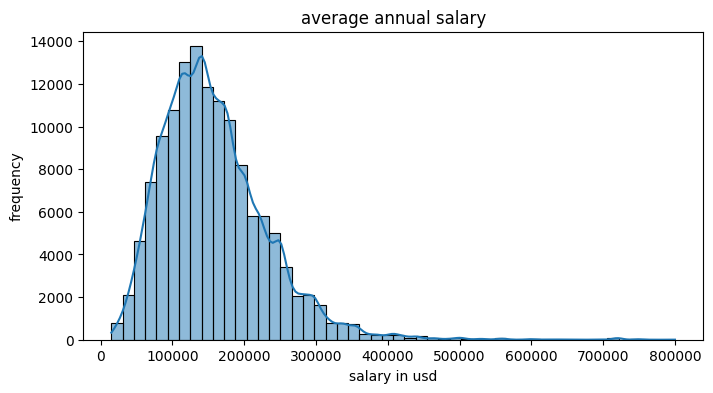

In [196]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['usd'], bins = 50, kde=True)
plt.title("average annual salary")
plt.xlabel("salary in usd")
plt.ylabel("frequency")
plt.show()

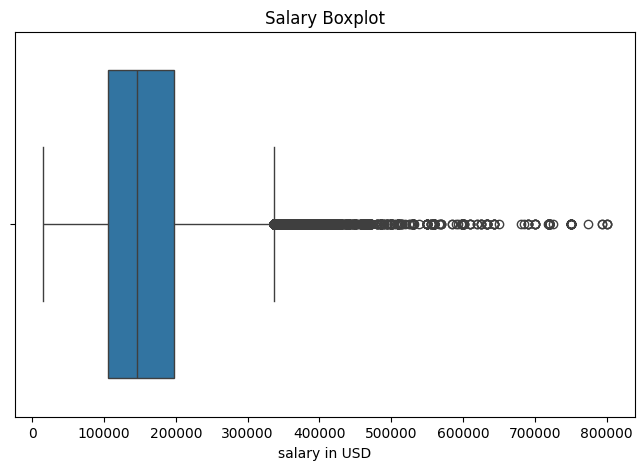

In [200]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_clean["usd"])
plt.title("Salary Boxplot")
plt.xlabel("salary in USD")
plt.show()

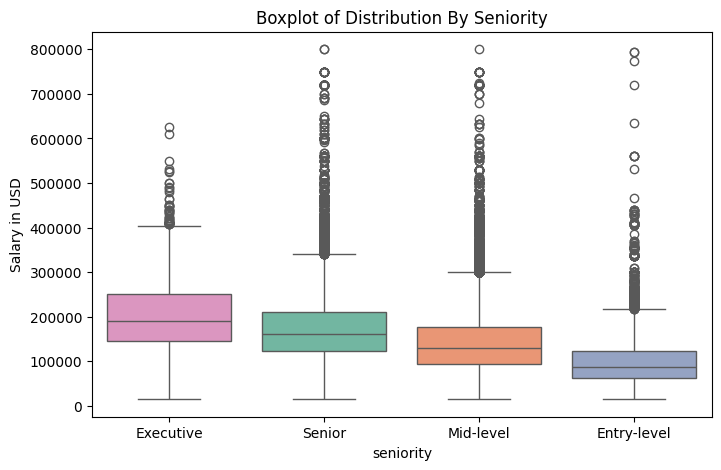

In [215]:
order_experience_level = ['Executive', 'Senior', 'Mid-level', 'Entry-level']
plt.figure(figsize=(8,5))
sns.boxplot(x="seniority", y='usd', data=df_clean, order=order_experience_level, palette="Set2", hue="seniority")
plt.title("Boxplot of Distribution By Seniority")
plt.ylabel("Salary in USD")
plt.show()

In [216]:
import matplotlib.pyplot as plt


In [222]:
# prompt: Create a bar chart of average salary by seniority using plotly

seniority_average_salary = df_clean.groupby('seniority')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(seniority_average_salary,
             x='seniority',
             y='usd',
             title='Average Salary by Seniority',
             labels={'seniority': 'Seniority Level', 'usd': 'Average Annual Salary (USD)'})

fig.show()

In [223]:
remote_count = df_clean["remote"].value_counts().reset_index()
remote_count.columns = ["type of work", "amount"]

fig = px.pie(remote_count,
             names='type of work',
             values="amount",
             title='Proportion of work types',

             )
fig.update_traces(textinfo='percent+label')
fig.show()

In [221]:
remote_count = df_clean["remote"].value_counts().reset_index()
remote_count.columns = ["type of work", "amount"]

fig = px.pie(remote_count,
             names='type of work',
             values="amount",
             title='Proportion of work types',
             hole=0.5,
             )
fig.update_traces(textinfo='percent+label')
fig.show()

In [225]:
df.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size
0,2025.0,Senior,full-time,Solutions Engineer,214000,USD,214000,US,Remote,US,Medium
1,2025.0,Senior,full-time,Solutions Engineer,136000,USD,136000,US,Remote,US,Medium
2,2025.0,Mid-level,full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Entry-level,full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


In [ ]:
pip install pycountry

In [ ]:
import pycountry

# Function to convert ISO-2 to ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Create new column with ISO-3 code
df_clean['residence_iso3'] = df_clean['residence'].apply(iso2_to_iso3)

# Calculate average salary by country (ISO-3)
df_ds = df_clean['position'] == 'Data Scientis'
media_ds_country = df_ds.groupby('residence_iso3')['usd'].mean().reset_index()

# Generate the map
fig = px.choropleth(media_ds_country,
                    locations='residence_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Average Salary by Country Data Scientist',
                    labels={'usd': 'Average Salary (USD)', 'residence_iso3': 'Country'})

Fig.show()

In [249]:
df_clean.head()

,Year,seniority,contract,position,salary,currency,usd,residence,remote,residence,company size,work_year
0,2025.0,Senior,full-time,Solutions Engineer,214000,USD,214000,US,Remote,US,Medium,2025
1,2025.0,Senior,full-time,Solutions Engineer,136000,USD,136000,US,Remote,US,Medium,2025
2,2025.0,Mid-level,full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium,2025
3,2025.0,Mid-level,full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium,2025
4,2025.0,Entry-level,full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium,2025


In [ ]:
df_clean.to_csv("Data-analysis-final.csv", index=False)